In [2]:
import os 
import yaml
from tqdm.notebook import tqdm_notebook as tqdm


In [3]:
img_folder = 'datasets/train_20241023/images'
label_folder = 'datasets/train_20241023/labels'
for category in os.listdir('datasets/train_20241023'):
    new_folder = os.path.join('datasets/train_20241023', category)
    for file in tqdm(os.listdir(new_folder)):
        if file.endswith('.jpg'):
            os.rename(os.path.join(new_folder, file), os.path.join(img_folder, file))
        else: 
            os.rename(os.path.join(new_folder, file), os.path.join(label_folder, file))

0it [00:00, ?it/s]

  0%|          | 0/9258 [00:00<?, ?it/s]

  0%|          | 0/4629 [00:00<?, ?it/s]

  0%|          | 0/13784 [00:00<?, ?it/s]

In [4]:
from sklearn.model_selection import train_test_split
import os
def train_val_split(data_dir, val_size=0.2):
    image_data_dir = os.path.join(data_dir, 'images')
    label_data_dir = os.path.join(data_dir, 'labels')

    img_train_dir_lst, img_val_dir_lst, label_train_dir_lst, label_val_dir_lst = train_test_split(os.listdir(image_data_dir), os.listdir(label_data_dir), test_size=val_size, random_state=42)
    train_folder = os.path.join(data_dir, 'train')
    val_folder = os.path.join(data_dir, 'validation')

    if not os.path.exists(train_folder):
        os.makedirs(train_folder, exist_ok=True)

    if not os.path.exists(val_folder):
        os.makedirs(val_folder, exist_ok=True)
    
    for img_train_dir, label_train_dir in zip(img_train_dir_lst, label_train_dir_lst):
        train_img_folder, train_label_folder = os.path.join(train_folder, 'images'), os.path.join(train_folder, 'labels')
        if not os.path.exists(train_img_folder):
            os.makedirs(train_img_folder, exist_ok=True)

        if not os.path.exists(train_label_folder):
           os.makedirs(train_label_folder, exist_ok=True)

        os.rename(os.path.join(image_data_dir, img_train_dir), os.path.join(train_img_folder, img_train_dir))
        os.rename(os.path.join(label_data_dir, label_train_dir), os.path.join(train_label_folder, label_train_dir))
    
    for img_val_dir, label_val_dir in zip(img_val_dir_lst, label_val_dir_lst):
        val_img_folder, val_label_folder = os.path.join(val_folder, 'images'), os.path.join(val_folder, 'labels')
        if not os.path.exists(val_img_folder):
            os.makedirs(val_img_folder, exist_ok=True)

        if not os.path.exists(val_label_folder):
           os.makedirs(val_label_folder, exist_ok=True)

        os.rename(os.path.join(image_data_dir, img_val_dir), os.path.join(val_img_folder, img_val_dir))
        os.rename(os.path.join(label_data_dir, label_val_dir), os.path.join(val_label_folder, label_val_dir))

train_val_split('datasets/train_20241023', val_size=0.1)

In [5]:
test_folder = 'datasets/train_20241023/validation/labels'
print(len(os.listdir(test_folder)))

1153


[0.14386 0.17476 0.16886 0.17845 0.17743 0.18053 0.19073 0.18613 0.1962
 0.19201 0.18998 0.19208 0.19297 0.19437]


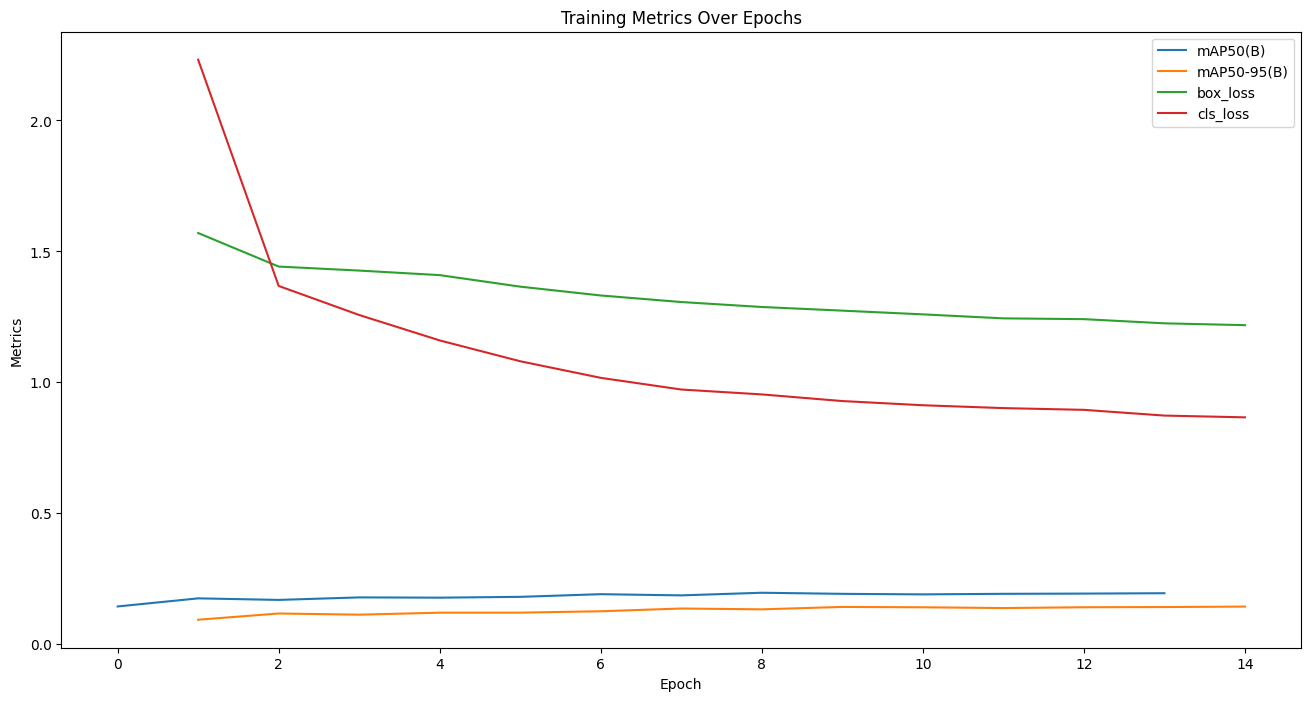

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
res = res = pd.DataFrame(pd.read_csv('runs/detect/train2/results.csv'))
# Plotting the mAP50(B) metric
print(np.array(res["metrics/mAP50(B)"]))
plt.figure(figsize=(16, 8))
plt.plot(res["metrics/mAP50(B)"], label="mAP50(B)")

# Uncomment if you want to plot additional metrics
plt.plot(res["epoch"], res["metrics/mAP50-95(B)"], label="mAP50-95(B)")
plt.plot(res["epoch"], res["train/box_loss"], label="box_loss")
plt.plot(res["epoch"], res["train/cls_loss"], label="cls_loss")

plt.xlabel("Epoch")
plt.ylabel("Metrics")
plt.title("Training Metrics Over Epochs")
plt.legend()
plt.show()

### Convert to grayscale

In [2]:
with open('/home/quangminh/Documents/code/Python/SOICTHackathon2024/datasets/train_20241023/train/labels/cam_01_00001.txt', 'r') as f: 
    text = f.readlines()

print(text)

['0 0.1578125 0.26666666666666666 0.0203125 0.058333333333333334\n', '3 0.30078125 0.2951388888888889 0.0921875 0.23194444444444445\n', '1 0.8984375 0.9159722222222222 0.203125 0.16805555555555557\n', '1 0.527734375 0.33055555555555555 0.03828125 0.06388888888888888\n', '1 0.540234375 0.29305555555555557 0.04140625 0.06111111111111111\n', '1 0.57421875 0.26666666666666666 0.05 0.06388888888888888\n', '3 0.61015625 0.32222222222222224 0.0453125 0.11388888888888889\n', '3 0.666796875 0.21736111111111112 0.07890625 0.08194444444444444\n', '0 0.433984375 0.22361111111111112 0.02734375 0.03888888888888889\n', '0 0.52109375 0.2222222222222222 0.0265625 0.041666666666666664\n', '0 0.376171875 0.225 0.02109375 0.03333333333333333\n', '0 0.390234375 0.21805555555555556 0.01796875 0.03611111111111111\n']


In [11]:
import os 
from tqdm.notebook import tqdm_notebook as tqdm
parents_dir = 'datasets/train_20241023'
for fol in os.listdir(parents_dir): 
    folder = parents_dir + '/' + fol + '/labels'
    for file in tqdm(os.listdir(folder)): 
        file = folder + '/' + file
        with open(file, 'r') as f: 
            lines = f.readlines() 
            
        for i in range(len(lines)):
            lines[i] = list(map(float, lines[i].split()))
            lines[i][0] = int(lines[i][0]) % 4
            lines[i] = ' '.join(map(str, lines[i])) + '\n'  # Convert line to string format

        with open(file, 'w') as f: 
            f.writelines(lines)  # Write each modified line back to the file

  0%|          | 0/1153 [00:00<?, ?it/s]

  0%|          | 0/10368 [00:00<?, ?it/s]

In [24]:
from PIL import Image, ImageOps
img = Image.open('datasets/train_20241023/train/images/cam_01_00001.jpg')
img = ImageOps.grayscale(img)

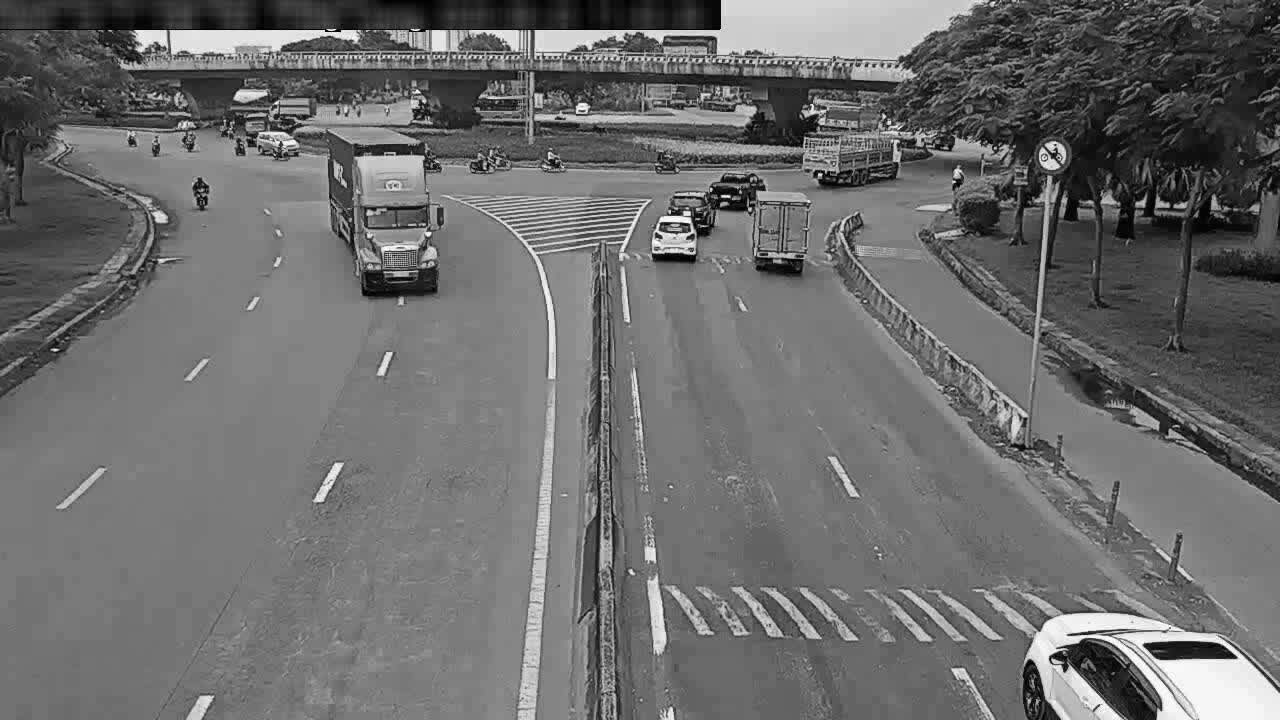

In [27]:
img

In [55]:
import os
from PIL import Image, ImageOps
from tqdm.autonotebook import tqdm
import numpy as np

parents_dir = 'datasets/train_20241023'
target_dir = 'datasets/grayscale_train'

# Loop through each subdirectory in parents_dir
for sub_dir in os.listdir(parents_dir):
    source_img_dir = os.path.join(parents_dir, sub_dir, 'images')
    target_img_dir = os.path.join(target_dir, sub_dir, 'images')

    # Create the target directory if it doesn't exist
    os.makedirs(target_img_dir, exist_ok=True)

    # Process each image in the current subdirectory
    for img_name in tqdm(os.listdir(source_img_dir)):
        img_path = os.path.join(source_img_dir, img_name)
        
        # Open and convert the image to grayscale
        img = Image.open(img_path)
        img = ImageOps.grayscale(img)

        img = np.asarray(img)

        # img_ = np.expand_dims(img, 0)

        gray_img = np.zeros((3, *img.shape), dtype=np.uint8)

        gray_img[0] = img.copy()
        gray_img[1] = img.copy()
        gray_img[2] = img.copy()

        gray_img = np.transpose(gray_img, [1, 2, 0])

        img = Image.fromarray(gray_img)

        # Save the grayscale image in the target directory with the same name
        target_img_path = os.path.join(target_img_dir, os.path.splitext(img_name)[0] + '.jpg')
        img.save(target_img_path)
        
        

        

  0%|          | 0/1153 [00:00<?, ?it/s]

  0%|          | 0/10368 [00:00<?, ?it/s]

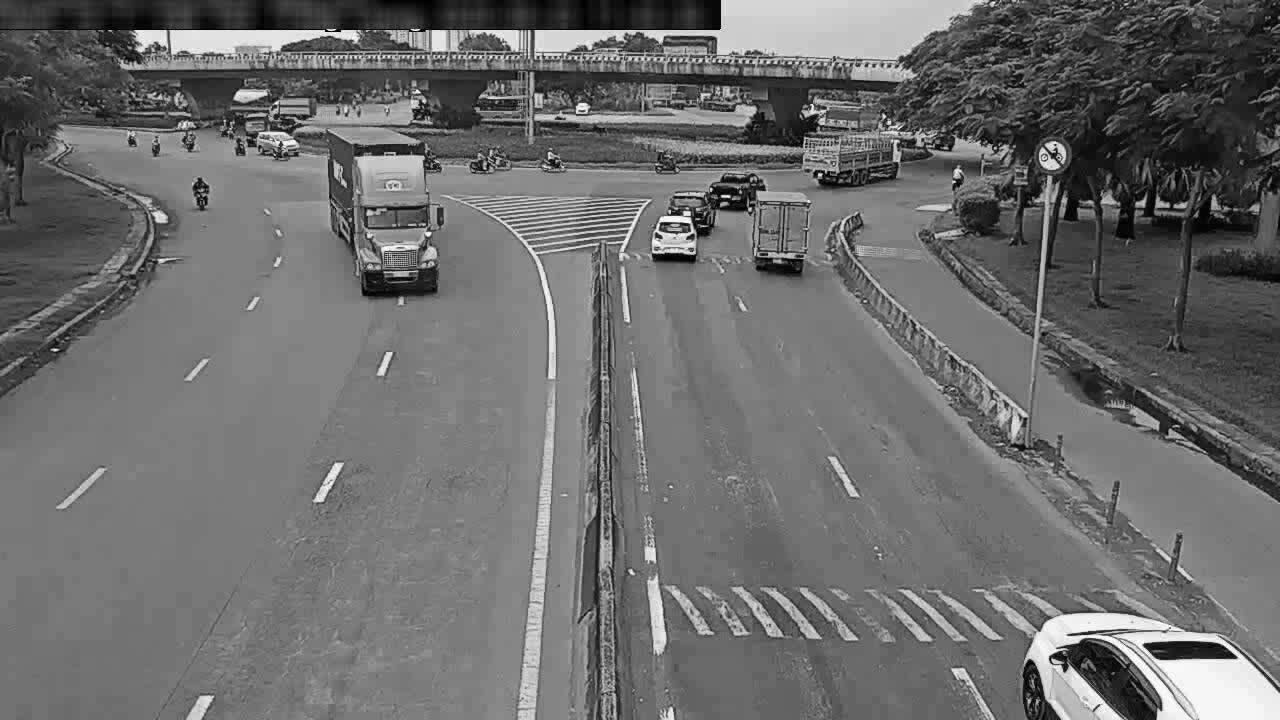

In [56]:
img = Image.open('datasets/grayscale_train/train/images/cam_01_00001.jpg')
img

In [59]:
import numpy as np

In [60]:
np.asarray(img).shape


(720, 1280, 3)

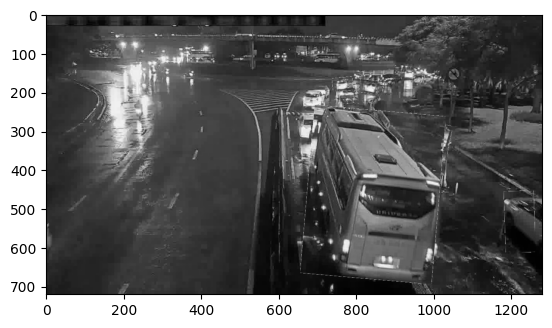

In [50]:
plt.imshow(gray_img)